<a href="https://colab.research.google.com/github/HiraY32/HiraY32/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Whenever we are going construct a VAR model we have to follow these steps 
1. Import pandas & numpy library for uploading & number reading in data table 
2. Import matplotlib for plotting the data 
3. Splitting the data into train(90%) & test(10%) & using the **train data for ADFULLER, VAR & VARMAX**
4. Import ADFULLER for stationarity check
5. Import VAR for VAR order selection or lag determination with AIC test
6. Import VARMAX for constructing actual VAR model 
7. Use of VAR model for forecasting next (10% time)
8. Comparing **test data with forecasted data** to see accuracy of predictability of VAR model

1. Importing library pandas & numpy for numbers & for uploading data table

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
filepath='/content/drive/MyDrive/Colab Notebooks/Assignment 3.csv'

In [ ]:
macro_data=pd.read_csv(filepath)

In [ ]:
macro_data.head()

,Time,Y,X
0,1969,51.53,12252
1,1970,50.23,12516
2,1971,54.63,12608
3,1972,64.48,12861
4,1973,51.82,13091


2. Plotting the data table

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

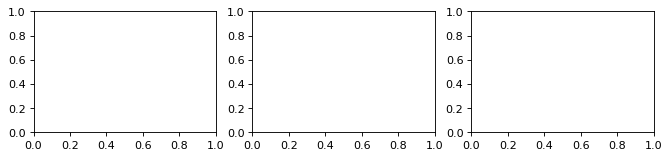

In [ ]:
# Essentials for plotting 
fig,axes=plt.subplots(nrows=1,ncols=3,dpi=80,figsize=(10,2))

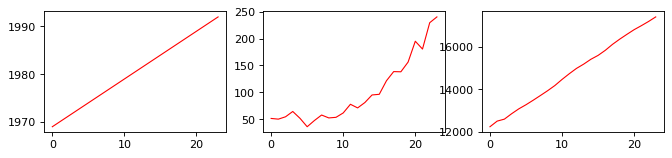

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,dpi=80,figsize=(10,2))
for i,ax in enumerate(axes.flatten()):
 data=macro_data[macro_data.columns[i]]
 ax.plot(data,color='red',linewidth=1)

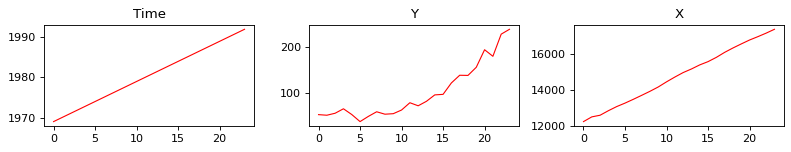

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,dpi=80,figsize=(10,2))
for i,ax in enumerate(axes.flatten()):
 data=macro_data[macro_data.columns[i]]
 ax.plot(data,color='red',linewidth=1) 
 ax.set_title(macro_data.columns[i])
plt.tight_layout()

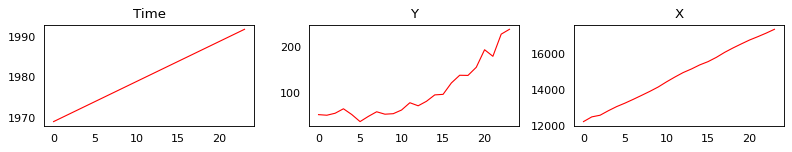

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,dpi=80,figsize=(10,2))
for i,ax in enumerate(axes.flatten()):
 data=macro_data[macro_data.columns[i]]
 ax.plot(data,color='red',linewidth=1)
 ax.set_title(macro_data.columns[i]) 
 ax.xaxis.set_ticks_position('none') 
 ax.yaxis.set_ticks_position('none') 
plt.tight_layout()

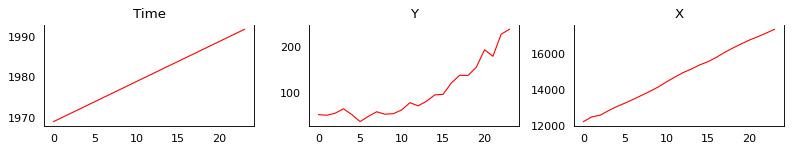

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,dpi=80,figsize=(10,2))
for i,ax in enumerate(axes.flatten()):
 data=macro_data[macro_data.columns[i]]
 ax.plot(data,color='red',linewidth=1)
 ax.set_title(macro_data.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines["top"].set_alpha(0)



plt.tight_layout()

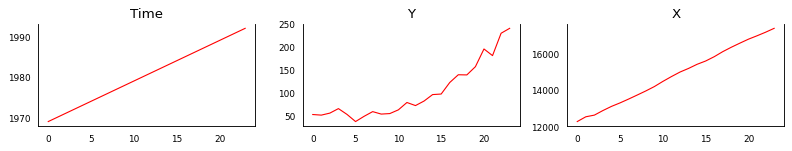

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,dpi=80,figsize=(10,2))
for i,ax in enumerate(axes.flatten()):
 data=macro_data[macro_data.columns[i]]
 ax.plot(data,color='red',linewidth=1)
 ax.set_title(macro_data.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines["top"].set_alpha(0)
 ax.tick_params(labelsize=8)



plt.tight_layout()

3. Splitting the data into train(90%) & test(10%) & using the **train data for ADFULLER, VAR & VARMAX**

In [ ]:
macro_data

,Time,Y,X
0,1969,51.53,12252
1,1970,50.23,12516
2,1971,54.63,12608
3,1972,64.48,12861
4,1973,51.82,13091
5,1974,36.13,13284
6,1975,47.64,13496
7,1976,57.88,13717
8,1977,52.50,13942
9,1978,53.62,14184


In [ ]:
train_dt=macro_data[0:-12].dropna()
test_dt=macro_data[-12:].dropna()

In [ ]:
train_dt.tail()

,Time,Y,X
7,1976,57.88,13717
8,1977,52.50,13942
9,1978,53.62,14184
10,1979,61.75,14471
11,1980,77.86,14738


In [ ]:
test_dt

,Time,Y,X
12,1981,71.11,14988
13,1982,81.03,15189
14,1983,95.18,15417
15,1984,96.38,15599
16,1985,121.58,15837
17,1986,138.58,16117
18,1987,138.23,16361
19,1988,156.26,16587
20,1989,195.01,16806
21,1990,180.49,16993


4. Import ADFULLER for stationarity check

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print('p value of original Y')
adfuller(train_dt.Y)[1]

p value of original Y


0.9971995630345153

This p value is higher than 0.05 so original Y not stationarity

Now we take first order differncing Y series for stationarity check

In [ ]:
print('p value of 1st order diff Y')
adfuller(train_dt.Y.diff().dropna())[1]

p value of 1st order diff Y


0.7439462753186002

In [ ]:
print('p value of 2nd order diff Y')
adfuller(train_dt.Y.diff().diff().dropna())[1]

p value of 2nd order diff Y


0.003523544369967598

p value of 2nd order diff Y is less than 0.05 so we consider this series of Y is stationary

All series are becoming stationary at second order differencing we consider second order differencing for further analysis of VAR order selection (AIC lag determination) & VARMAX

In [ ]:
train_dt.diff2=(train_dt.Y.diff().diff().dropna())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
train_dt.head()

,Time,Y,X
0,1969,51.53,12252
1,1970,50.23,12516
2,1971,54.63,12608
3,1972,64.48,12861
4,1973,51.82,13091


In [ ]:
train_dt.diff2.head()

2     5.70
3     5.45
4   -22.51
5    -3.03
6    27.20
Name: Y, dtype: float64

5. Import VAR for VAR order selection or lag determination with AIC test

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
model=VAR(train_dt)

In [ ]:
result=model.fit()

In [ ]:
 print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, May, 2022
Time:                     05:17:08
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -42.0352
Nobs:                     11.0000    HQIC:                  -42.7429
Log likelihood:           198.756    FPE:                3.99259e-19
AIC:                     -42.4693    Det(Omega_mle):     1.57456e-19
--------------------------------------------------------------------
Results for equation Time
             coefficient       std. error            t-stat            prob
---------------------------------------------------------------------------
const           1.000000         0.000000     364883797.571           0.000
L1.Time         1.000000         0.000000  698044313641.456           0.000
L1.Y            0.000000         0.000000             0.001           0.999
L1.X 

On the basis of VAR select order summary we come to know that first  minimum AIC is found at 4th lag so we will consider 4 lags for VARMAX

6. Import VARMAX for constructing actual VAR model

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
VARMAX_model=VARMAX(train_dt,order=(1,0), enfroce_stationarity=True)

In [ ]:
VARMAX_result=VARMAX_model.fit(disp=False)

In [ ]:
print(VARMAX_result.summary())

                           Statespace Model Results                           
Dep. Variable:     ['Time', 'Y', 'X']   No. Observations:                   12
Model:                         VAR(1)   Log Likelihood                -119.100
                          + intercept   AIC                            274.201
Date:                Thu, 26 May 2022   BIC                            282.929
Time:                        05:28:19   HQIC                           270.969
Sample:                             0                                         
                                 - 12                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                         nan   Jarque-Bera (JB):    13.64, 0.26, 0.74
Prob(Q):                               nan   Prob(JB):             0.00, 0.88, 0.69
Heteroskedasticity (H):   0.25, 0.65, 0.19   Skew:               -1.89, -0.09, 0.36
Prob(H) (two-sided):      0.21, 0.69,

7. Use of VAR model for forecasting next (10% time)

In [ ]:
n_forecast=12
predict=VARMAX_result.get_prediction(start=len(train_dt),end=len(train_dt)+n_forecast-1)

In [ ]:
predictions=predict.predicted_mean

In [ ]:
predictions.coloumns=[['X_p,Y_p']]
predictions

,Time,Y,X
12,1979.354735,79.207153,14635.716417
13,1978.517519,80.892180,14471.014411
14,1977.581713,81.339153,14274.097188
15,1976.635471,80.692894,14066.904558
16,1975.746944,79.255922,13866.385681
17,1974.963551,77.322049,13684.814737
18,1974.313712,75.148088,13530.117675
19,1973.809563,72.944210,13406.397891
20,1973.450131,70.870783,13314.595368
21,1973.224634,69.039527,13253.202469


In [ ]:
test_dt

,Time,Y,X
12,1981,71.11,14988
13,1982,81.03,15189
14,1983,95.18,15417
15,1984,96.38,15599
16,1985,121.58,15837
17,1986,138.58,16117
18,1987,138.23,16361
19,1988,156.26,16587
20,1989,195.01,16806
21,1990,180.49,16993


In [ ]:
TvP=pd.concat([test_dt,predictions],axis=1)

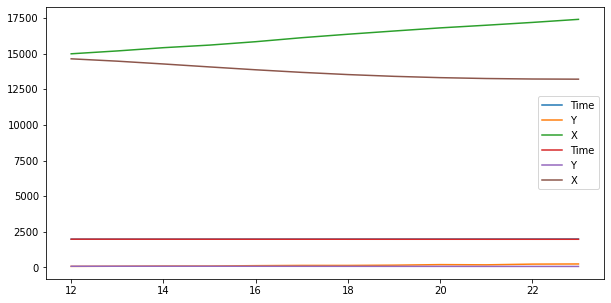

In [ ]:
TvP.plot(figsize=(10,5))